<a href="https://colab.research.google.com/github/melius30/CE_200A_project/blob/main/Problem_set_9_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE200A: Environmental Fluid Mechanics
## Problem Set 9 (Group Project)
*Course Professor: Tina Chow (tinakc@berkeley.edu) (CEE, UC Berkeley)
#Group 1 members
1) Md Elius

2) Sreedurga Cherukumalli

3) Jon Gallardo

4) Grace Chen

## Project Overview
Your engineering team is hired to create a computer model for the optimal disposal of organic waste in a vertically-mixed surface water channel. The model should account for dissolved oxygen (DO) and biological oxygen demand (BOD). Your simulation should be based on the depth-averaged (two-dimensional) equations for advection, diffusion, and chemical reaction. The 2D scalar equations to solve are the extended Streeter-Phelps equations:

### Governing Equations

$$
\frac{\partial B}{\partial t} + u \frac{\partial B}{\partial x} + v \frac{\partial B}{\partial y} = D_x \frac{\partial^2 B}{\partial x^2} + D_y \frac{\partial^2 B}{\partial y^2} - K_r B + \delta(x - x_0, y - y_0) Q_B
$$

$$
\frac{\partial O}{\partial t} + u \frac{\partial O}{\partial x} + v \frac{\partial O}{\partial y} = D_x \frac{\partial^2 O}{\partial x^2} + D_y \frac{\partial^2 O}{\partial y^2} - K_d B + K_a (O_{sat} - O)
$$

where:
- \( B \): concentration of BOD
- \( O \): concentration of DO
- \( O_{sat} \): saturation level of oxygen (8 mg/L)
- \( u \): velocity in the x-direction (set to 0.4 m/s)
- \( v \): velocity in the y-direction (set to 0 m/s)
- \( D_x, D_y \): dispersion coefficients in x and y directions (set to 0.5 m\(^2\)/s)
- \( K_r \): BOD decay coefficient (set to 0.01 s\(^{-1}\))
- \( K_d \): DO utilization coefficient (set to 0.01 s\(^{-1}\))
- \( K_a \): re-aeration coefficient (set to 0.02 s\(^{-1}\))
- \( Q_B \): load strength of BOD source (set to 70 g/s/m, steady input)

**Initial Conditions:**
- \( B(x, y, 0) = 0 \)
- \( O(x, y, 0) = O_{sat} \)

**Boundary Conditions:**
1. **Inflow (x=0)**:
   $$
   B(0, y, t) = 0, \quad O(0, y, t) = O_{sat}
   $$
2. **Outflow (x=L)** (where \(L = 150\) m):
   $$
   \frac{\partial B}{\partial x} \bigg|_{(L, y, t)} = 0, \quad \frac{\partial O}{\partial x} \bigg|_{(L, y, t)} = 0
   $$
3. **Solid Boundaries (y=0 and y=W)** (where \(W = 30\) m):
   $$
   \frac{\partial C}{\partial y} \bigg|_{(x, 0, t)} = 0, \quad \frac{\partial C}{\partial y} \bigg|_{(x, W, t)} = 0
   $$


1. Write the discretized equations using explicit first order time stepping and second order central differences in space for simplicity. Use ghost points to implement the boundary conditions. Sketch the domain and the grid so you know how to number all your points including ghost points.


# Solution: Discretized BOD and DO Equations

## 1. Discretized BOD Equation

# Defining the Grid and Parameters

- **Length** \( L = 150 m\)
- **Width** \( W = 30 m\)
-**Spatial step sizes**:

$$
 \Delta x \ and \Delta y\
$$

## Initial Conditions

- \( B(x, y, 0) = 0 \)
- \( O(x, y, 0) = O_{sat} = 8 mg/L\)

## Boundary Conditions

Apply appropriate boundary conditions for inflow, outflow, and solid boundaries as given in the problem statement.

---

# Discretizing the Equations (Central Differences for Space)

For each point \( (i, j) \) in the grid:

### Time Derivative for BOD

The time derivative is approximated as:

$$
\frac{\partial B}{\partial t} \approx \frac{B_{i,j}^{n+1} - B_{i,j}^n}{\Delta t}
$$

### Advection Terms

1. **In the \( x \)-direction**:

   $$
   \frac{\partial B}{\partial x} \approx \frac{B_{i+1, j}^n - B_{i-1, j}^n}{2 \Delta x}
   $$

2. **In the \( y \)-direction**:

   $$
   \frac{\partial B}{\partial y} \approx \frac{B_{i, j+1}^n - B_{i, j-1}^n}{2 \Delta y}
   $$

### Diffusion Terms

1. **In the \( x \)-direction**:

   $$
   \frac{\partial^2 B}{\partial x^2} \approx \frac{B_{i+1, j}^n - 2 B_{i,j}^n + B_{i-1, j}^n}{(\Delta x)^2}
   $$

2. **In the \( y \)-direction**:

   $$
   \frac{\partial^2 B}{\partial y^2} \approx \frac{B_{i, j+1}^n - 2 B_{i,j}^n + B_{i, j-1}^n}{(\Delta y)^2}
   $$



## 1. Discretized BO Equation

$$
\frac{\partial B}{\partial t} + u \frac{\partial B}{\partial x} + v \frac{\partial B}{\partial y} = D_x \frac{\partial^2 B}{\partial x^2} + D_y \frac{\partial^2 B}{\partial y^2} - K_r B + \delta(x - x_0, y - y_0) Q_B
$$

For explicit time stepping and second-order central differences, this becomes:

$$
B_{i,j}^{n+1} = B_{i,j}^n + \Delta t \left[ -u \frac{B_{i+1,j}^n - B_{i-1,j}^n}{2 \Delta x} - v \frac{B_{i,j+1}^n - B_{i,j-1}^n}{2 \Delta y} \right.
$$

$$
\left. + D_x \frac{B_{i+1,j}^n - 2B_{i,j}^n + B_{i-1,j}^n}{(\Delta x)^2} + D_y \frac{B_{i,j+1}^n - 2B_{i,j}^n + B_{i,j-1}^n}{(\Delta y)^2} - K_r B_{i,j}^n + \frac{Q_B(i, j)}{\Delta x \cdot \Delta y} \right]
$$

## 2. Discretized DO Equation

The DO equation is:

$$
\frac{\partial O}{\partial t} + u \frac{\partial O}{\partial x} + v \frac{\partial O}{\partial y} = D_x \frac{\partial^2 O}{\partial x^2} + D_y \frac{\partial^2 O}{\partial y^2} - K_d B + K_a (O_{sat} - O)
$$

In discretized form, this equation becomes:

$$
O_{i,j}^{n+1} = O_{i,j}^n + \Delta t \left[ -u \frac{O_{i+1,j}^n - O_{i-1,j}^n}{2 \Delta x} - v \frac{O_{i,j+1}^n - O_{i,j-1}^n}{2 \Delta y} \right.
$$

$$
\left. + D_x \frac{O_{i+1,j}^n - 2O_{i,j}^n + O_{i-1,j}^n}{(\Delta x)^2} + D_y \frac{O_{i,j+1}^n - 2O_{i,j}^n + O_{i,j-1}^n}{(\Delta y)^2} - K_d B_{i,j}^n + K_a (O_{sat} - O_{i,j}^n) \right]
$$




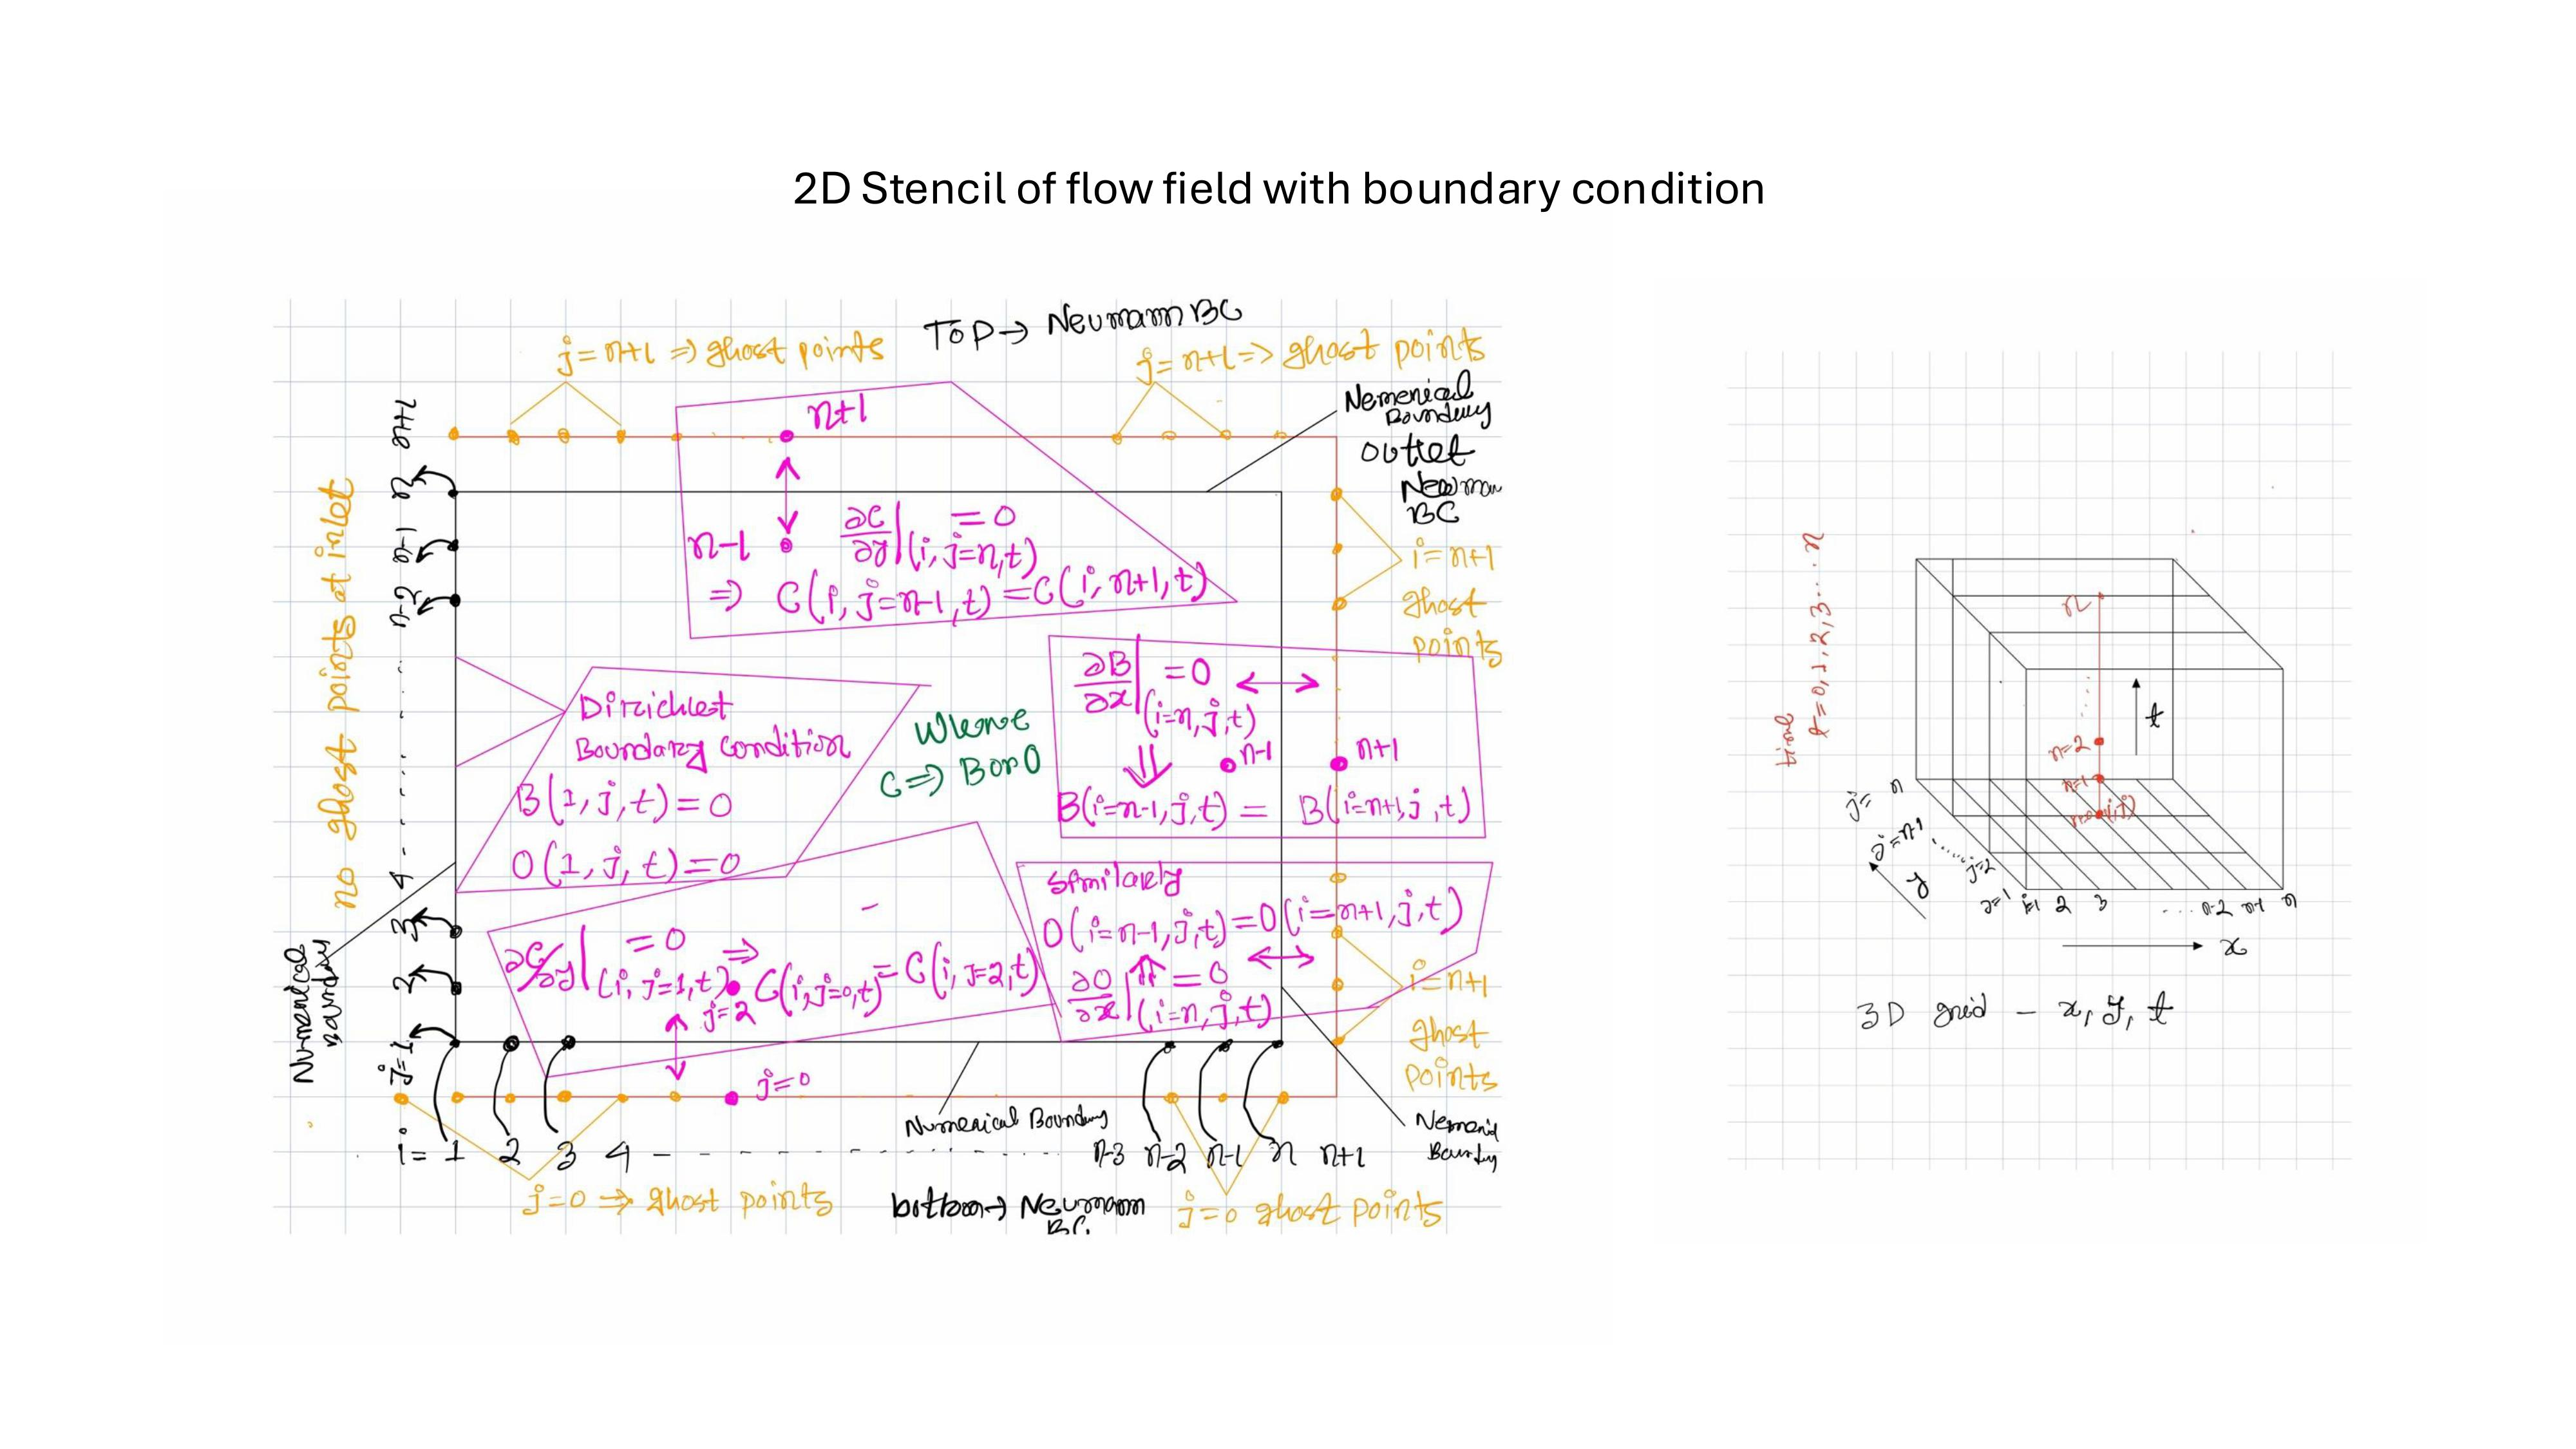

2. Before running the code, perform a von Neumann stability analysis for the  - diffusion equation to determine what parameters you must choose to guarantee a stable numerical solution. See the handout for an example of how to do this in 2D. You can ignore the reactive and source terms in this analysis and set ∆x = ∆y and u = v and the x and y wavenumbers equal at the end when you are trying to simplify the expressions. Also determine the cell Peclet number limit for the 2D equation (this can be done like in 1D by dividing your equation by r and regrouping coefficients to be in terms of P)

%%markdown

**BOD equation:**

$$
\frac{B_{i,j}^{n+1} - B_{i,j}^n}{\Delta t} + u \left[ \frac{B_{i+1,j}^{n} - B_{i-1,j}^{n}}{2 \Delta x} \right] + v \left[ \frac{B_{i,j+1}^{n} - B_{i,j-1}^{n}}{2 \Delta y} \right] = D_x \frac{B_{i+1,j}^{n} - 2B_{i,j}^{n} + B_{i-1,j}^{n}}{\Delta x^2} + D_y \frac{B_{i,j+1}^{n} - 2B_{i,j}^{n} + B_{i,j-1}^{n}}{\Delta y^2}
$$



Ignoring source and reactive term



---

**assume a solution of the form**



$$
B_{l,j}^n = \xi^n e^{i k_x x_l} e^{i k_y y_j}
$$

---

$$
\xi^{n+1} = \xi^{n} - \xi^{n}\frac{u \Delta t}{2 \Delta x} (e^{i k_x \Delta x} - e^{-i k_x \Delta x}) - \xi^{n}\frac{v \Delta t}{2 \Delta y} (e^{i k_y \Delta y} - e^{-i k_y \Delta y}) + \xi^{n}\frac{D_x \Delta t}{\Delta x^2} (e^{i k_x \Delta x} + e^{-i k_x \Delta x} - 2) + \xi^{n}\frac{D_y \Delta t}{\Delta y^2} (e^{i k_y \Delta y} + e^{-i k_y \Delta y} - 2)
$$

---


$$
\xi = 1 - \frac{u \Delta t}{2 \Delta x} (e^{i k_x \Delta x} - e^{-i k_x \Delta x}) - \frac{v \Delta t}{2 \Delta y} (e^{i k_y \Delta y} - e^{-i k_y \Delta y}) + \frac{D_x \Delta t}{\Delta x^2} (e^{i k_x \Delta x} + e^{-i k_x \Delta x} - 2) + \frac{D_y \Delta t}{\Delta y^2} (e^{i k_y \Delta y} + e^{-i k_y \Delta y} - 2)
$$

Using Euler’s Identity:

$$
\xi = 1 - i \frac{u \Delta t}{\Delta x} (2 \sin(k_x \Delta x)) + \frac{D_x \Delta t}{\Delta x^2} (2 \cos(k_x \Delta x) - 2)
$$

Rewriting:

$$
\xi = 1 + 4r (\cos(k_x \Delta x) - 1) - (2 C_r \sin(k_x \Delta x)) i
$$

---

With:

$$
r = \frac{D_x \Delta t}{\Delta x^2}
$$

$$
C_r = \frac{u \Delta t}{\Delta x}
$$

---

If \( k_x \Delta x = \pi \):


$$
1 - 8r \leq 1
$$

$$
-1 - 8r \leq 0
$$

$$
8r \geq 0 \Rightarrow r \geq \frac{1}{4}
$$

If \( k_x \Delta x = 0 \):

Assume \( \sin(k_x \Delta x) = 0 \).


Then:

$$
\| \xi \| = \left[ 1 - 8r \sin^2\left(\frac{k_x \Delta x}{2}\right) \right]^2 + [2 C_r \sin(k_x \Delta x)]^2 \leq 1
$$


---

Let:

$$
-8r \left( \frac{k_x \Delta x}{2} \right)^2 + 4 (C_r)^2 \leq 1
$$

Continuing:

$$
1 - 16r \left( \frac{k_x \Delta x}{2} \right)^2 + 4r \left( \frac{k_x \Delta x}{2} \right)^4 + 4(C_r)^2 \left( \frac{k_x \Delta x}{2} \right)^2 \leq 1
$$

If \( k_x \Delta x = 0 \), then:

$$
1 - 4r \left( \frac{k_x \Delta x}{2} \right)^2 + (C_r \cdot k_x)^2 \leq 1
$$

Simplifying further:

$$
1 - (4r - 4(C_r)^2) (k_x)^2 \leq 1
$$

This implies:

$$
r \geq (C_r)^2
$$

Therefore, the stability criterion requires:

$$
\frac{1}{4} >(equal) r \geq (C_r)^2
$$


---




### Cell Peclet number limit

1. **Starting Equation for \( B_{i,j}^{n+1} \):**

   $$
   \frac{B_{i,j}^{n+1} - B_{i,j}^n}{\Delta t} = -u \frac{B_{i+1,j}^n - B_{i-1,j}^n}{2 \Delta x} - v \frac{B_{i,j+1}^n - B_{i,j-1}^n}{2 \Delta y} + D_x \frac{B_{i+1,j}^n - 2B_{i,j}^n + B_{i-1,j}^n}{\Delta x^2} + D_y \frac{B_{i,j+1}^n - 2B_{i,j}^n + B_{i,j-1}^n}{\Delta y^2}
   $$

2. **Solving for \( B_{i,j}^{n+1} \):**
  $$
   r = \frac{{D_x \Delta t}}{\Delta x^2}
  $$
  $$
  Cr = \frac{{u \Delta x}}{\Delta t}
  $$

   $$
   B_{i,j}^{n+1} = (1 - 4r) B_{i,j}^n + r \left( B_{i+1,j}^n + B_{i-1,j}^n + B_{i,j+1}^n + B_{i,j-1}^n \right) - \frac{Cr}{2} \left(- B_{i+1,j}^n+B_{i,j-1}^n -B_{i,j+1}^n+ B_{i-1,j}^n \right)
   $$

  
3. **Expanded Form with Constants:**

   $$
   {2B_{i,j}^{n+1}}/r = \left({2/r} - 8 \right) B_{i,j}^n  + {(2 - P})(B_{i+1,j}^n+ B_{i,j+1})+ {(2 + P})(B_{i-1,j}^n+ B_{i,j-1})
   $$

4. **Stability Condition:**

   Unless \( P = 2 \), oscillations will develop due to negative coefficients.


3. When you write your code, it is recommended that you not store the 2D concentration field at all times, which would use a lot of memory and slow down your code. Instead, just store an old and new array to perform your time stepping, and collect whatever output you will need as you go, as you did in previous problem sets. Your code should do the following:

  Implement checks in your code so that it will not execute if the stable parameter ranges you determined above are not satisfied.

  Compute the concentration of DO and BOD at each grid point in the river.

  Output the magnitude and location of the minimum DO in the river. If the DO becomes less than 6 mg/L, the river becomes anoxic.

  Run until steady state and plot the steady-state BOD and DO concentrations using “contourf” in matlab. Add colorbars and use “shading flat” to improve the appearance of the contours.

 River becomes anoxic at time 39.15 seconds, minimum DO = 6.00 mg/L


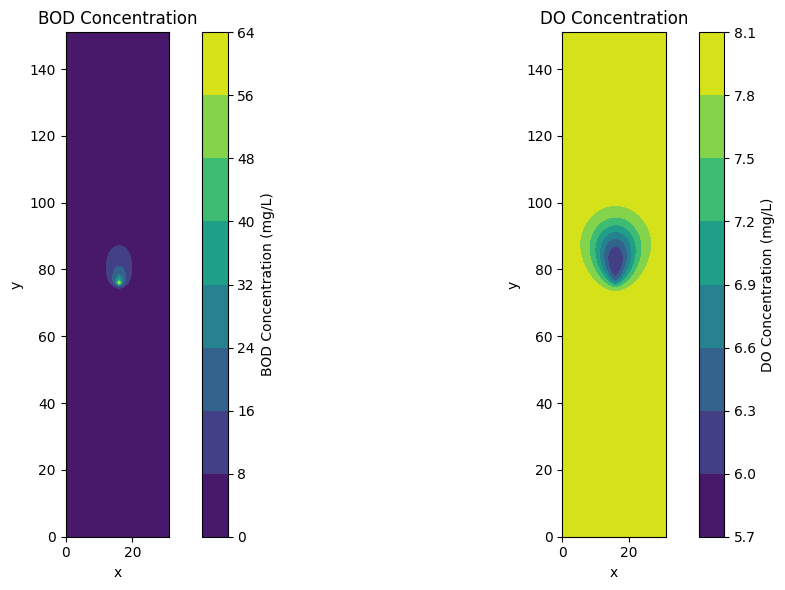

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 150.0  # Length of the domain in meters
W = 30.0   # Width of the domain in meters
Dx = 0.5   # Dispersion coefficient in x-direction (m^2/s)
Dy = 0.5   # Dispersion coefficient in y-direction (m^2/s)
u = 0.4    # Velocity in x-direction (m/s)
v = 0.0    # Velocity in y-direction (m/s)
Kr = 0.01  # BOD decay coefficient (1/s)
Kd = 0.01  # DO utilization coefficient (1/s)
Ka = 0.02  # Re-aeration coefficient (1/s)
Osat = 8.0 # Saturation level of DO (mg/L)
QB = 70.0  # Load strength of BOD source (g/s/m)

# Define spatial resolution
Delta_x = 1  # Spatial step size in x-direction
Delta_y = 1  # Spatial step size in y-direction
Nx = L/Delta_x +2  # Number of grid points in x-direction (including ghost points)
Ny = W/Delta_y +2  # Number of grid points in y-direction (including ghost points)


Delta_t =0.45

# Von Neumann stability analysis parameters
r = Dx * Delta_t / (Delta_x ** 2)
Cr = u * Delta_t / Delta_x

# Check stability condition
if not (1 / 4 >= r >= Cr**2):
    raise ValueError(f"Stability condition not met: r = {r}, Cr = {Cr}")

# Define time-stepping
t_end = 1000  # End time in seconds
time_steps = int(t_end / Delta_t)

# Initialize concentration fields
B = np.zeros((int(Nx), int(Ny)))  # BOD concentration
O = Osat * np.ones((int(Nx), int(Ny)))  # DO concentration, initially at saturation level

# Define the source location
x0, y0 = int(Nx) // 2, int(Ny) // 2  # Middle of the domain

# Time-stepping loop
for n in range(time_steps):
    B_new = np.zeros_like(B)
    O_new = np.zeros_like(O)


    for i in range(1, int(Nx) - 1):
        for j in range(1, int(Ny) - 1):
            # Discretized BOD equation
            adv_x_B = u * (B[i + 1, j] - B[i - 1, j]) / (2 * Delta_x)
            adv_y_B = v * (B[i, j + 1] - B[i, j - 1]) / (2 * Delta_y)
            diff_x_B = Dx * (B[i + 1, j] - 2 * B[i, j] + B[i - 1, j]) / (Delta_x**2)
            diff_y_B = Dy * (B[i, j + 1] - 2 * B[i, j] + B[i, j - 1]) / (Delta_y**2)
            reaction_B = Kr * B[i, j]
            source_B = (QB / (Delta_x * Delta_y)) if (i == x0 and j == y0) else 0

            B_new[i, j] = B[i, j] + Delta_t * (-adv_x_B - adv_y_B + diff_x_B + diff_y_B - reaction_B + source_B)

            # Discretized DO equation
            adv_x_O = u * (O[i + 1, j] - O[i - 1, j]) / (2 * Delta_x)
            adv_y_O = v * (O[i, j + 1] - O[i, j - 1]) / (2 * Delta_y)
            diff_x_O = Dx * (O[i + 1, j] - 2 * O[i, j] + O[i - 1, j]) / (Delta_x**2)
            diff_y_O = Dy * (O[i, j + 1] - 2 * O[i, j] + O[i, j - 1]) / (Delta_y**2)
            reaction_O = Kd * B[i, j]
            reaeration_0 = Ka * (Osat - O[i, j])

            O_new[i, j] = O[i, j] + Delta_t * (-adv_x_O - adv_y_O + diff_x_O + diff_y_O - reaction_O+ reaeration_0)

    # Apply boundary conditions (ghost points)
    # Inflow (left boundary)
    B_new[0, :] = 0
    O_new[0, :] = Osat

    # Outflow (right boundary)
    # 2nd order accurate
    B_new[-1, :] = B_new[-3, :]
    O_new[-1, :] = O_new[-3, :]

    # No flux at top and bottom boundaries
     # 2nd order accurate
    B_new[:, 0] = B_new[:, 2]
    B_new[:, -1] = B_new[:, -3]
    O_new[:, 0] = O_new[:, 2]
    O_new[:, -1] = O_new[:, -3]

    # Update the fields
    B = B_new
    O = O_new

    # Output minimum DO value to check for anoxic conditions
    min_O = np.min(O)
    if min_O < 6.0:
        print(f" River becomes anoxic at time {n * Delta_t:.2f} seconds, minimum DO = {min_O:.2f} mg/L")

        break

# Plot steady-state BOD and DO concentrations
plt.figure(figsize=(12, 6))

# BOD plot
plt.subplot(1, 2, 1)
plt.contourf(B, cmap='viridis')
plt.colorbar(label='BOD Concentration (mg/L)')
plt.title('BOD Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')

# DO plot
plt.subplot(1, 2, 2)
plt.contourf(O, cmap='viridis')
plt.colorbar(label='DO Concentration (mg/L)')
plt.title('DO Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


4. To impress everyone, your team decides to animate the results to explain the conse- quences of the company’s waste disposal plan. One movie should show the evolution of BOD and DO (use plotyy to show these on the same graph) along the centerline of the BOD source (along the channel length). Another movie should show the time evolution of a 3D surface of DO levels over the whole river (use surf). You don’t need to capture every frame - just make sure your movie looks smooth enough. Include the time somewhere in each frame that you capture. See the Python template for how to do this.

 River becomes anoxic at time 39.15 seconds, minimum DO = 6.00 mg/L


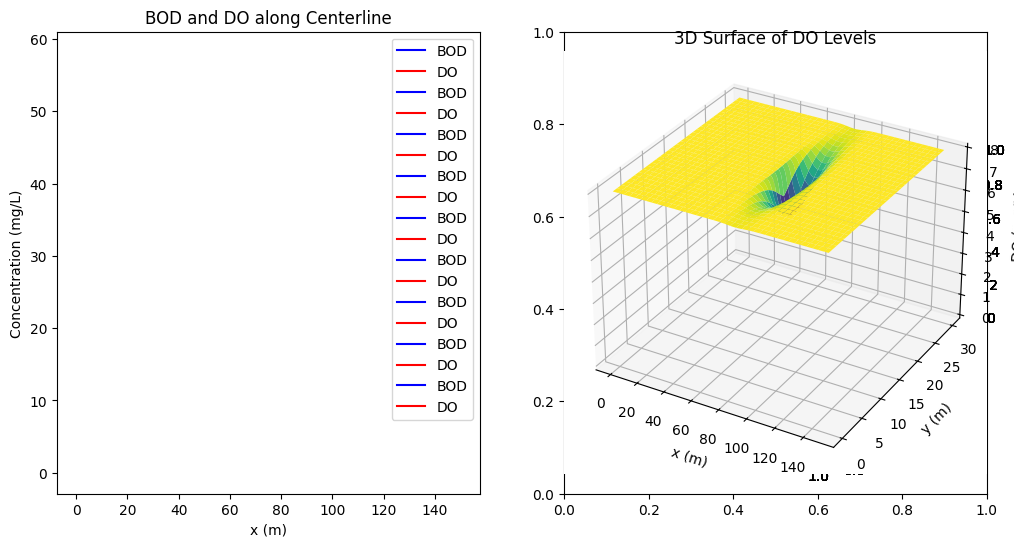

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Define parameters
L = 150.0  # Length of the domain in meters
W = 30.0   # Width of the domain in meters
Dx = 0.5   # Dispersion coefficient in x-direction (m^2/s)
Dy = 0.5   # Dispersion coefficient in y-direction (m^2/s)
u = 0.4    # Velocity in x-direction (m/s)
v = 0.0    # Velocity in y-direction (m/s)
Kr = 0.01  # BOD decay coefficient (1/s)
Kd = 0.01  # DO utilization coefficient (1/s)
Ka = 0.02  # Re-aeration coefficient (1/s)
Osat = 8.0 # Saturation level of DO (mg/L)
QB = 70.0  # Load strength of BOD source (g/s/m)

# Define spatial resolution
Delta_x = 1  # Spatial step size in x-direction
Delta_y = 1  # Spatial step size in y-direction
Nx = int(L / Delta_x) + 2  # Number of grid points in x-direction (including ghost points)
Ny = int(W / Delta_y) + 2  # Number of grid points in y-direction (including ghost points)

Delta_t = 0.45

# Von Neumann stability analysis parameters
r = Dx * Delta_t / (Delta_x ** 2)
Cr = u * Delta_t / Delta_x

# Check stability condition
if not (1 / 4 > r >= Cr**2):
    raise ValueError(f"Stability condition not met: r = {r}, Cr = {Cr}")

# Define time-stepping
t_end = 1000  # End time in seconds
time_steps = int(t_end / Delta_t)

# Initialize concentration fields
B = np.zeros((Nx, Ny))  # BOD concentration
O = Osat * np.ones((Nx, Ny))  # DO concentration, initially at saturation level

# Define the source location
x0, y0 = Nx // 2, Ny // 2  # Middle of the domain

# Prepare for animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ims = []

# Time-stepping loop
for n in range(time_steps):
    B_new = np.zeros_like(B)
    O_new = np.zeros_like(O)

    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            # Discretized BOD equation
            adv_x_B = -u * (B[i + 1, j] - B[i - 1, j]) / (2 * Delta_x)
            adv_y_B = -v * (B[i, j + 1] - B[i, j - 1]) / (2 * Delta_y)
            diff_x_B = Dx * (B[i + 1, j] - 2 * B[i, j] + B[i - 1, j]) / (Delta_x**2)
            diff_y_B = Dy * (B[i, j + 1] - 2 * B[i, j] + B[i, j - 1]) / (Delta_y**2)
            reaction_B = -Kr * B[i, j]
            source_B = (QB / (Delta_x * Delta_y)) if (i == x0 and j == y0) else 0

            B_new[i, j] = B[i, j] + Delta_t * (adv_x_B + adv_y_B + diff_x_B + diff_y_B + reaction_B + source_B)

            # Discretized DO equation
            adv_x_O = -u * (O[i + 1, j] - O[i - 1, j]) / (2 * Delta_x)
            adv_y_O = -v * (O[i, j + 1] - O[i, j - 1]) / (2 * Delta_y)
            diff_x_O = Dx * (O[i + 1, j] - 2 * O[i, j] + O[i - 1, j]) / (Delta_x**2)
            diff_y_O = Dy * (O[i, j + 1] - 2 * O[i, j] + O[i, j - 1]) / (Delta_y**2)
            reaction_O = -Kd * B[i, j] + Ka * (Osat - O[i, j])

            O_new[i, j] = O[i, j] + Delta_t * (adv_x_O + adv_y_O + diff_x_O + diff_y_O + reaction_O)

    # Apply boundary conditions (ghost points)
    # Inflow (left boundary)
    B_new[0, :] = 0
    O_new[0, :] = Osat

    # Outflow (right boundary)
     # 2nd order accurate
    B_new[-1, :] = B_new[-3, :]
    O_new[-1, :] = O_new[-3, :]

    # No flux at top and bottom boundaries
     # 2nd order accurate
    B_new[:, 0] = B_new[:, 2]
    B_new[:, -1] = B_new[:, -3]
    O_new[:, 0] = O_new[:, 2]
    O_new[:, -1] = O_new[:, -3]

    # Update the fields
    B = B_new
    O = O_new

    # Output minimum DO value to check for anoxic conditions
    min_O = np.min(O)
    if min_O < 6.0:
        print(f" River becomes anoxic at time {n * Delta_t:.2f} seconds, minimum DO = {min_O:.2f} mg/L")
        break

    # Animation: Plot BOD and DO along the centerline
    if n % 10 == 0:  # Capture every 10th frame for the animation
        line1, = ax1.plot(np.linspace(0, L, Nx), B[:, y0], 'b-', label='BOD')
        line2, = ax1.plot(np.linspace(0, L, Nx), O[:, y0], 'r-', label='DO')
        ax1.set_title('BOD and DO along Centerline')
        ax1.set_xlabel('x (m)')
        ax1.set_ylabel('Concentration (mg/L)')
        ax1.legend()

        X, Y = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, W, Ny))
        ax2.clear()
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(X, Y, O.T, cmap='viridis')
        ax2.set_title('3D Surface of DO Levels')
        ax2.set_xlabel('x (m)')
        ax2.set_ylabel('y (m)')
        ax2.set_zlabel('DO (mg/L)')
        ax2.set_zlim(0, Osat)

        ims.append([line1, line2])

# Create animation
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
plt.show()

# Save animation
ani.save('bod_do_animation.mp4', writer='ffmpeg')


We will work more on animation

5. Explain to your client that their proposed plan to dump 70 g/s/m in the middle of the river channel (somewhere along y = W/2, but away from the upstream boundary influence) with the current parameters will cause the river to become anoxic. Propose an alternative, following your group’s constraints below, with the same total loading strength but so that the DO concentration always stays greater than 6 mg/L, and support your proposal with plots. For any of the scenarios below, if you need to split the sources or extend the length of the river in your model domain to make sure that there are no further effects downstream, that is fine. The sources should all be located in the original 30 m by 150 m domain.

    Groups 1, 9: The alternative you propose must not interfere with protected habi- tat zones which are located along each river bank extending out 5 m from the shore on both sides. Put constraints in your code so that users are not allowed to select locations in the protected zones and propose a solution which benefits the river habitat even more, if possible, by proposing a configuration that keeps the DO even higher than the minimum requirement of 6 mg/L.

Steady state reached at time 365.85 seconds


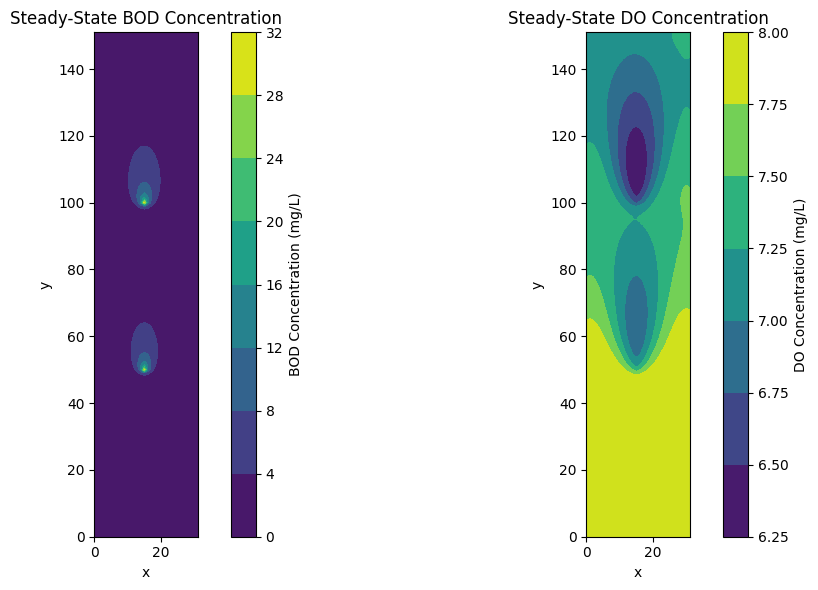

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 150.0  # Length of the domain in meters
W = 30.0   # Width of the domain in meters
Dx = 0.5   # Dispersion coefficient in x-direction (m^2/s)
Dy = 0.5   # Dispersion coefficient in y-direction (m^2/s)
u = 0.4    # Velocity in x-direction (m/s)
v = 0.0    # Velocity in y-direction (m/s)
Kr = 0.01  # BOD decay coefficient (1/s)
Kd = 0.01  # DO utilization coefficient (1/s)
Ka = 0.02  # Re-aeration coefficient (1/s)
Osat = 8.0 # Saturation level of DO (mg/L)
QB = 70.0  # Load strength of BOD source (g/s/m)

# Define spatial resolution
Delta_x = 1  # Spatial step size in x-direction
Delta_y = 1  # Spatial step size in y-direction
Nx = L/Delta_x+2  # Number of grid points in x-direction (including ghost points)
Ny = W/Delta_y+2 # Number of grid points in y-direction (including ghost points)


Delta_t = 0.45

# Von Neumann stability analysis parameters
r = Dx * Delta_t / (Delta_x ** 2)
Cr = u * Delta_t / Delta_x

# Check stability condition
if not (1 / 4 >= r >= Cr**2):
    raise ValueError(f"Stability condition not met: r = {r}, Cr = {Cr}")

# Define time-stepping
t_end = 500  # End time in seconds
time_steps = int(t_end / Delta_t)

# Initialize concentration fields
B = np.zeros((int(Nx), int(Ny)))  # BOD concentration
O = Osat * np.ones((int(Nx), int(Ny)))  # DO concentration, initially at saturation level

# Define the source locations
sources = [(50, 15), (100, 15)]  # Two sources in the domain

# Tolerance for steady-state condition
tolerance = 1e-5

# Time-stepping loop
for n in range(time_steps):
    B_new = np.zeros_like(B)
    O_new = np.zeros_like(O)

    for i in range(1, int(Nx) - 1):
        for j in range(1, int(Ny) - 1):
            # Discretized BOD equation
            adv_x_B = -u * (B[i + 1, j] - B[i - 1, j]) / (2 * Delta_x)
            adv_y_B = -v * (B[i, j + 1] - B[i, j - 1]) / (2 * Delta_y)
            diff_x_B = Dx * (B[i + 1, j] - 2 * B[i, j] + B[i - 1, j]) / (Delta_x**2)
            diff_y_B = Dy * (B[i, j + 1] - 2 * B[i, j] + B[i, j - 1]) / (Delta_y**2)
            reaction_B = -Kr * B[i, j]
            source_B = ((QB*0.5)/(Delta_x * Delta_y)) if (i, j) in sources else 0

            B_new[i, j] = B[i, j] + Delta_t * (adv_x_B + adv_y_B + diff_x_B + diff_y_B + reaction_B + source_B)

            # Discretized DO equation
            adv_x_O = -u * (O[i + 1, j] - O[i - 1, j]) / (2 * Delta_x)
            adv_y_O = -v * (O[i, j + 1] - O[i, j - 1]) / (2 * Delta_y)
            diff_x_O = Dx * (O[i + 1, j] - 2 * O[i, j] + O[i - 1, j]) / (Delta_x**2)
            diff_y_O = Dy * (O[i, j + 1] - 2 * O[i, j] + O[i, j - 1]) / (Delta_y**2)
            reaction_O = -Kd * B[i, j] + Ka * (Osat - O[i, j])

            O_new[i, j] = O[i, j] + Delta_t * (adv_x_O + adv_y_O + diff_x_O + diff_y_O + reaction_O)

    # Apply boundary conditions (ghost points)
    # Inflow (left boundary)
    B_new[0, :] = 0
    O_new[0, :] = Osat

    # Outflow (right boundary)
     # 2nd order accurate
    B_new[-1, :] = B_new[-3, :]
    O_new[-1, :] = O_new[-3, :]

    # No flux at top and bottom boundaries
     # 2nd order accurate
    B_new[:, 0] = B_new[:, 2]
    B_new[:, -1] = B_new[:, -3]
    O_new[:, 0] = O_new[:, 2]
    O_new[:, -1] = O_new[:, -3]


    # Check for steady-state condition
    if np.max(np.abs(B_new - B)) < tolerance and np.max(np.abs(O_new - O)) < tolerance:
        print(f"Steady state reached at time {n * Delta_t:.2f} seconds")
        break

    # Update the fields
    B = B_new
    O = O_new

    # Output minimum DO value to check for anoxic conditions
    min_O = np.min(O)
    if min_O < 6.0:
        print(f"River becomes anoxic at time {n * Delta_t:.2f} seconds, minimum DO = {min_O:.2f} mg/L")

        break

# Plot steady-state BOD and DO concentrations
plt.figure(figsize=(12, 6))

# BOD plot
plt.subplot(1, 2, 1)
plt.contourf(B, cmap='viridis')
plt.colorbar(label='BOD Concentration (mg/L)')
plt.title('Steady-State BOD Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')

# DO plot
plt.subplot(1, 2, 2)
plt.contourf(O, cmap='viridis')
plt.colorbar(label='DO Concentration (mg/L)')
plt.title('Steady-State DO Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


Looks like both BOD and DO reach steady state condition after 366.30 seconds once we split the source in two different locations (50,15) and (100,15) points. The BOD doesn't reach the havitat area across 5m bank of the river.